In [19]:
import qubx

%qubxd

from typing import cast

import pandas as pd
import qubx.ta.indicators as ta
from qubx.data import loader, AsOhlcvSeries
from qubx.utils.charting.lookinglass import LookingGlass
from qubx.utils.charting.lookinglass import OHLCV

In [3]:
ldr60 = loader("BINANCE.UM", "1h", source="mqdb::quantlab")

In [27]:
ohlc = cast(OHLCV, ldr60.read(
    "BINANCE.UM:BTCUSDT",
    start="2024-01-01",
    stop="2024-02-01",
    transform=AsOhlcvSeries()
))

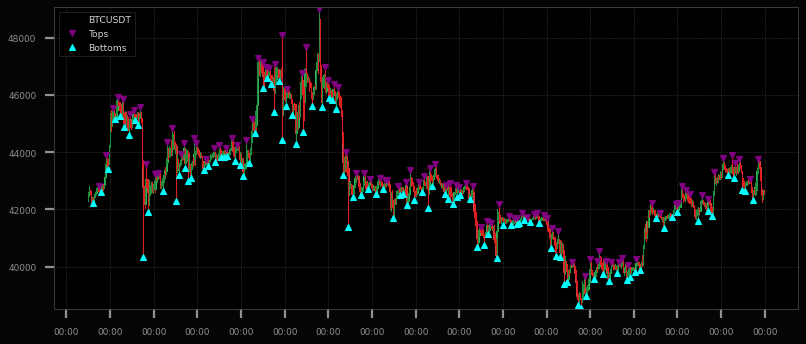

In [30]:
pivots = ta.pivots(ohlc, before=2, after=2).pd()

LookingGlass(
    [
        ohlc,
        "arrow-down",
        "purple",
        pivots["Tops"]["price"].rename("Tops"),
        "arrow-up",
        "cyan",
        pivots["Bottoms"]["price"].rename("Bottoms"),
    ],
    backend="mpl",
).look().hover().show()